Implementation an adaptation of blog post:  Lau, Benjamin.  ["Andrew Ng's Machine Learning Course in Python (Neural Networks)"](https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-neural-networks-e526b41fdcd9) Towards Data Science.  27 December, 2018.  

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io
from pathlib import Path

In [2]:
PATH = Path.home() / "Code/cipher813/coursera_ng_machine_learning/machine-learning-ex3/ex3/"

In [3]:
data = scipy.io.loadmat(PATH / "ex3data1.mat")

X = data["X"]
y = data["y"]

print(X.shape, y.shape)

(5000, 400) (5000, 1)


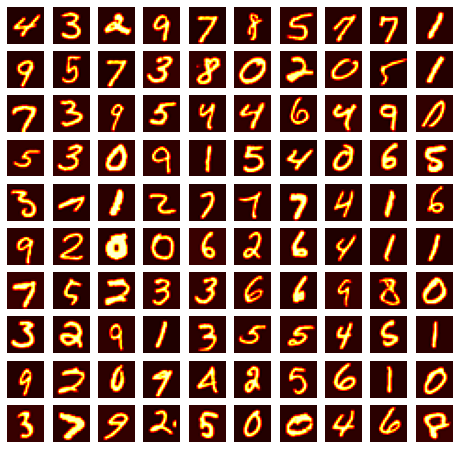

In [4]:
fig, axis = plt.subplots(10,10, figsize=(8,8))
for i in range(10):
    for j in range(10):
        
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot")
        axis[i,j].axis("off")

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def lr_cost_function(theta, X, y, lmda):
    """takes in numpy arry of theta, X, y and float lambda to compute
    the regularized logistic cost function"""
    m = len(y)
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    reg_cost = cost + lmda/(2*m) * sum(theta[1:]**2)
    
    # compute gradient
    j_0 = 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (lmda/m)*theta[1:]
    grad = np.vstack((j_0[:,np.newaxis],j_1))
    return reg_cost[0], grad

def gradient_descent(X, y, theta, alpha, num_iters, lmda):
    """Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration"""
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        cost, grad = lr_cost_function(theta, X, y, lmda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
        
    return theta, J_history

def ova(X, y, num_labels, lmda):
    """Takes in numpy array of X, y, int num_labels and float lambda to train
    multiple logistic regression classifiers depending on the number of num_labels
    using gradient descent
    
    returns a matrix of theta, where the i-th row corresponds to the classifier for label i
    """
    m, n = X.shape
    initial_theta = np.zeros((n+1,1))
    all_theta = []
    all_J = []
    # add intercept terms
    X = np.hstack((np.ones((m,1)),X))
    
    for i in range(1, num_labels+1):
        theta, J_history = gradient_descent(X, np.where(y==i,1,0), initial_theta, 1, 300, lmda)
        all_theta.extend(theta)
        all_J.extend(J_history)
    return np.array(all_theta).reshape(num_labels, n+1), all_J